In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **Data Exploration**

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9820.000000,9809.000000,9820.000000
mean,4902.427902,55272.862677,230.971583
std,2829.203809,32040.609644,626.947665
min,1.000000,1040.000000,0.444000
25%,2453.750000,23223.000000,17.272000
50%,4902.500000,58103.000000,54.514000
75%,7352.250000,90008.000000,210.568000
max,9800.000000,99301.000000,22638.480000


from matplotlib import pyplot as plt
_df_0['Row ID'].plot(kind='hist', bins=20, title='Row ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Postal Code'].plot(kind='hist', bins=20, title='Postal Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Row ID', y='Postal Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Postal Code', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Row ID'].plot(kind='line', figsize=(8, 4), title='Row ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Postal Code'].plot(kind='line', figsize=(8, 4), title='Postal Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Row ID', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Postal Code', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Sales', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9820 entries, 0 to 9819
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9820 non-null   int64  
 1   Order ID       9820 non-null   object 
 2   Order Date     9820 non-null   object 
 3   Ship Date      9820 non-null   object 
 4   Ship Mode      9820 non-null   object 
 5   Customer ID    9820 non-null   object 
 6   Customer Name  9820 non-null   object 
 7   Segment        9820 non-null   object 
 8   Country        9820 non-null   object 
 9   City           9820 non-null   object 
 10  State          9820 non-null   object 
 11  Postal Code    9809 non-null   float64
 12  Region         9820 non-null   object 
 13  Product ID     9820 non-null   object 
 14  Category       9820 non-null   object 
 15  Sub-Category   9820 non-null   object 
 16  Product Name   9820 non-null   object 
 17  Sales          9820 non-null   float64
dtypes: float

In [7]:
df['Category'].value_counts()

,count
Category,
Office Supplies,5925
Furniture,2080
Technology,1815


In [8]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5868
Second Class,1909
First Class,1504
Same Day,539


In [9]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5112
Corporate,2959
Home Office,1749


In [10]:
df['State'].value_counts()

,count
State,
California,1930
New York,1080
Texas,967
Pennsylvania,572
Washington,495
...,...
maryland,1
VIRGINIA,1
nevada,1


# **Data Cleaning**

####1.Handling Missing Values

In [11]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [12]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [13]:
Burlington_postal_code = 5401

df['Postal Code'] = df['Postal Code'].fillna(Burlington_postal_code)

In [14]:
df['Postal Code'].isna().sum()

0

#### 2.Handling Duplicates

In [15]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,7627,US-2016-159499,21/11/2016,23/11/2016,Second Class,EM-14095,Eudokia Martin,Corporate,United States,Phoenix,Arizona,85023.0,West,OFF-AP-10002867,Office Supplies,Appliances,Fellowes Command Center 5-outlet power strip,325.632
9801,6789,CA-2016-118843,13/09/2016,20/09/2016,Standard Class,JH-15910,Jonathan Howell,Consumer,United States,Atlanta,Georgia,30318.0,South,OFF-PA-10001712,Office Supplies,Paper,Xerox 1948,69.930
9802,8329,CA-2018-118577,06/10/2018,11/10/2018,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Belleville,New Jersey,7109.0,East,OFF-PA-10001357,Office Supplies,Paper,Xerox 1886,143.700
9803,1798,US-2018-139465,27/08/2018,30/08/2018,First Class,MR-17545,Mathew Reese,Home Office,United States,New York City,New York,10024.0,East,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,37.008
9804,5898,CA-2017-167682,03/04/2017,09/04/2017,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,Indiana,47374.0,Central,FUR-FU-10003799,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",71.120
9805,4534,CA-2015-140403,10/10/2015,10/10/2015,Same Day,TN-21040,Tanja Norvell,Home Office,United States,Manteca,California,95336.0,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",15.280
9806,2674,CA-2015-126403,09/09/2015,12/09/2015,Second Class,RR-19525,Rick Reed,Corporate,United States,Lowell,Massachusetts,1852.0,East,OFF-ST-10000078,Office Supplies,Storage,Tennsco 6- and 18-Compartment Lockers,1325.850
9807,6503,CA-2015-129147,02/11/2015,06/11/2015,Standard Class,LC-17050,Liz Carlisle,Consumer,United States,Medina,Ohio,44256.0,East,TEC-PH-10001552,Technology,Phones,I Need's 3d Hello Kitty Hybrid Silicone Case C...,50.232
9808,3190,US-2018-146416,20/10/2018,22/10/2018,Second Class,JE-16165,Justin Ellison,Corporate,United States,Woodland,California,95695.0,West,OFF-BI-10001787,Office Supplies,Binders,Wilson Jones Four-Pocket Poly Binders,20.928
9809,1377,CA-2015-126361,04/08/2015,09/08/2015,Second Class,VD-21670,Valerie Dominguez,Consumer,United States,Pleasant Grove,Utah,84062.0,West,OFF-PA-10000806,Office Supplies,Paper,Xerox 1934,447.840


In [16]:
df = df.drop_duplicates()

In [17]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


####3.Formating

In [18]:
df['Postal Code'].value_counts()

,count
Postal Code,
10035.0,253
10024.0,225
10009.0,220
94122.0,195
10011.0,193
...,...
77520.0,1
77536.0,1
52240.0,1


In [19]:
'Removing .0 in every postal code as it is inconsistent to real-time'

def format_zip(x):
  return int(x)

In [20]:
df['Postal Code'] = df['Postal Code'].apply(format_zip)

In [21]:
df['Postal Code'].value_counts()

,count
Postal Code,
10035,253
10024,225
10009,220
94122,195
10011,193
...,...
77520,1
77536,1
52240,1


####4.Standardization

In [22]:
df['State'].value_counts()

,count
State,
California,1926
New York,1079
Texas,966
Pennsylvania,572
Washington,495
...,...
maryland,1
VIRGINIA,1
nevada,1


In [23]:
#some values are uppercased,lowercased and capitalised, thus creating an inconsistency, we have to standardize the naming convention to lowercased letters

def standardize_states(x):
  return x.lower()

In [24]:
df['State'] = df['State'].apply(standardize_states)

In [25]:
df['State'].value_counts()

,count
State,
california,1946
new york,1097
texas,973
pennsylvania,582
washington,504
illinois,483
ohio,454
florida,373
michigan,253


####5.Creating a new column for time taken

In [26]:
from datetime import datetime

In [27]:
def convert_to_date(x):
    try:
      return datetime.strptime(x, '%d/%m/%y')
    except ValueError:
    # Handle dates with extra characters like '17' at the end
      return datetime.strptime(x[:-2], '%d/%m/%y')

In [28]:
df['Order Date'] = df['Order Date'].apply(convert_to_date)

In [29]:
df['Ship Date'] = df['Ship Date'].apply(convert_to_date)

In [30]:
df['Deliver Time'] = df['Ship Date'] - df['Order Date']

In [31]:
df['Deliver Time'].value_counts()

,count
Deliver Time,
4 days,2661
5 days,2127
2 days,1283
6 days,1149
3 days,967
7 days,587
0 days,514
1 days,361
-362 days,53


####6.Removing incosistency

In [32]:
df['Deliver Time'] = df['Deliver Time'].dt.days

In [33]:
df = df[df['Deliver Time'] >= 0]

In [34]:
df['Deliver Time'].value_counts()

,count
Deliver Time,
4,2661
5,2127
2,1283
6,1149
3,967
7,587
0,514
1,361
8,2


####7.Removing stopwords in Product Name

In [35]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Product Name'] = df['Product Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]).lower())

In [36]:
df['Product Name'].value_counts()

,count
Product Name,
staple envelope,46
staples,45
easy-staple paper,44
avery non-stick binders,20
ki adjustable-height table,17
...,...
star micronics tsp100 tsp143lan receipt printer,1
"snap-a-way black print carbonless speed message, no reply area, duplicate",1
kensington 6 outlet smartsocket surge protector,1


####8.handling outliers

In [37]:
value_counts = df['Product Name'].value_counts()

In [38]:
filtered_values = value_counts[value_counts > 5].index

In [39]:
filtered_values

Index(['staple envelope', 'staples', 'easy-staple paper',
       'avery non-stick binders', 'ki adjustable-height table',
       'staples misc. colors', 'storex dura pro binders', 'staple remover',
       'staple-based wall hangings',
       'situations contoured folding chairs, 4/set',
       ...
       'gould plastics 9-pocket panel bin, 18-3/8w x 5-1/4d x 20-1/2h, black',
       'tenex traditional chairmats medium pile carpet, standard lip, 36" x 48"',
       'xerox 1906', 'peel & seel recycled catalog envelopes, brown',
       'astroparche fine business paper',
       'snap-a-way black print carbonless ruled speed letter, triplicate',
       'telephone message books fax/mobile section, 5 1/2" x 3 3/16"',
       'imation secure+ hardware encrypted usb 2.0 flash drive; 16gb',
       'hp standard 104 key ps/2 keyboard',
       'boston model 1800 electric pencil sharpeners, putty/woodgrain'],
      dtype='object', name='Product Name', length=738)

In [40]:
df = df[df['Product Name'].isin(filtered_values)]

In [41]:
df['Product Name'].value_counts()

,count
Product Name,
staple envelope,46
staples,45
easy-staple paper,44
avery non-stick binders,20
ki adjustable-height table,17
...,...
avery metallic poly binders,6
acco 6 outlet guardian premium plus surge suppressor,6
akro stacking bins,6


In [42]:
df.shape

(5798, 19)

In [43]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Deliver Time'],
      dtype='object')

####9.removing unnecesssary columns

In [44]:
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID','Country'])

In [45]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Deliver Time'],
      dtype='object')

In [46]:
df.shape

(5798, 13)

In [47]:
df.dtypes

,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Segment,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object


#Exploratory Data Analysis


####1.Shipment mode vs Delivery time

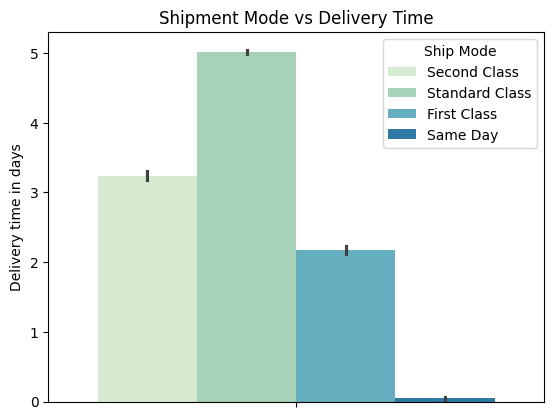

In [48]:
sns.barplot(data=df,hue='Ship Mode', y='Deliver Time', palette='GnBu')
plt.title('Shipment Mode vs Delivery Time')
plt.ylabel('Delivery time in days')
plt.show()

####2.Sales according to region

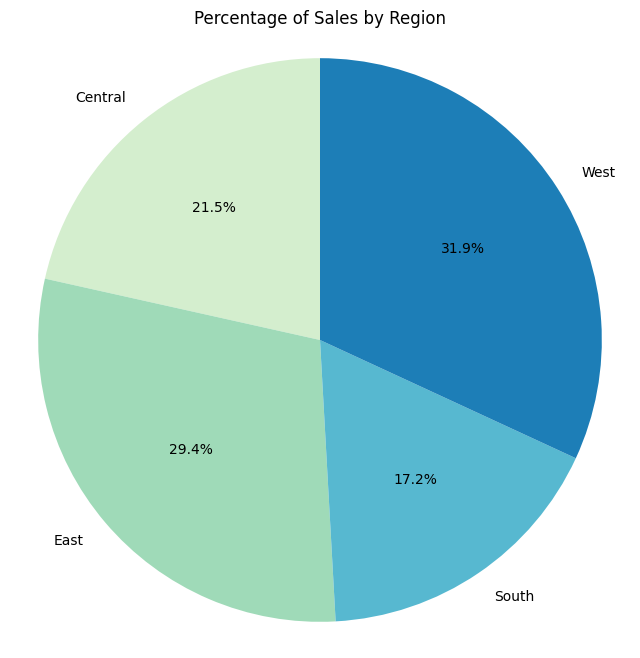

In [77]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', colors=sns.color_palette('GnBu', len(region_sales)), startangle=90)
plt.title('Percentage of Sales by Region')
plt.axis('equal')
plt.show()

####3.Sales according to states

<ipython-input-76-78edeb11bb1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='Sales', palette='GnBu')


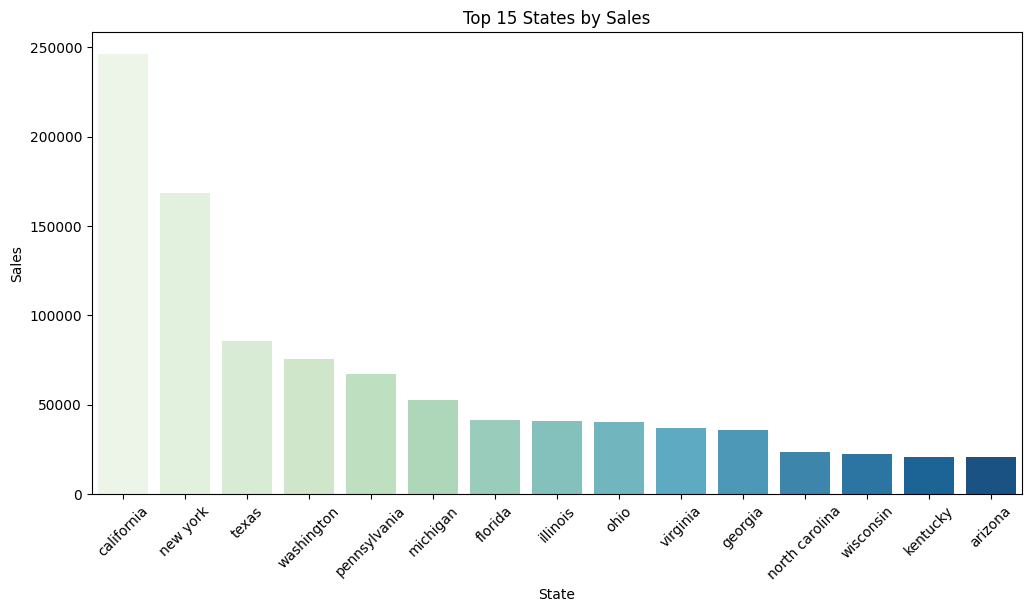

In [76]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
top_states = df.groupby("State")['Sales'].sum().sort_values(ascending=False).head(15).reset_index()
top_states['Sales'] = top_states['Sales'].round(2)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='State', y='Sales', palette='GnBu')
plt.title("Top 15 States by Sales")
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

####4.Sales according to category of the product

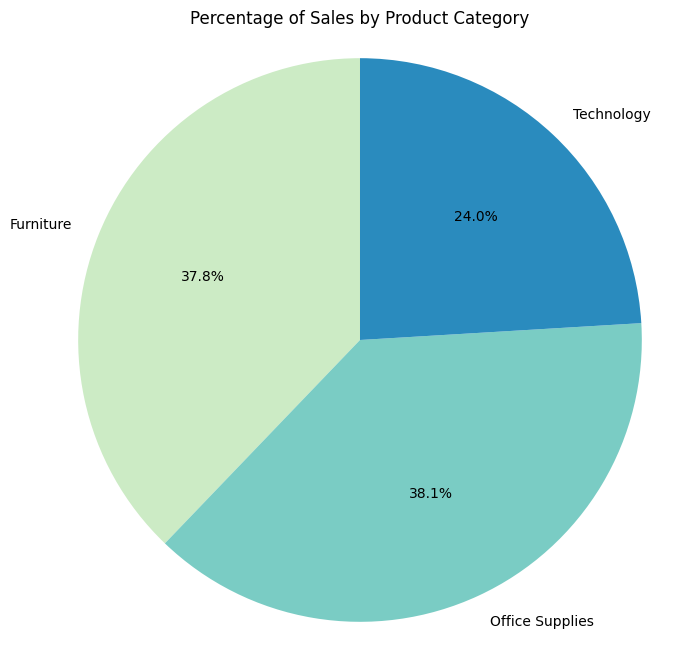

In [81]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%',
        colors=sns.color_palette('GnBu', len(category_sales)), startangle=90)
plt.title('Percentage of Sales by Product Category')
plt.axis('equal')
plt.show()

####5.Delivery time according to the state

<ipython-input-54-f12bed991258>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='State', y='Deliver Time', palette='GnBu', width = 0.5, legend = False)


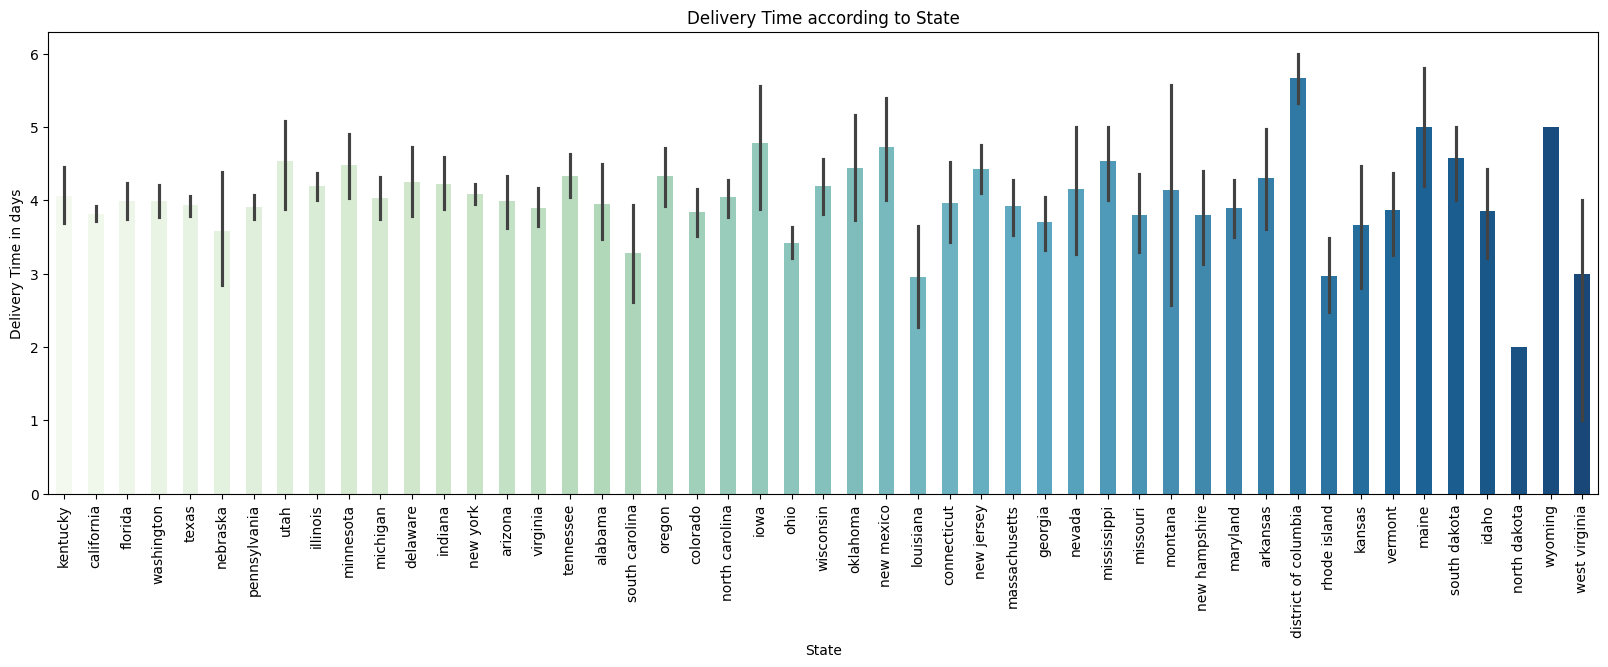

In [54]:
sns.barplot(data=df,x='State', y='Deliver Time', palette='GnBu', width = 0.5, legend = False)
plt.xticks(rotation=90)
rcParams['figure.figsize'] = 20,6
plt.title('Delivery Time according to State')
plt.ylabel('Delivery Time in days')
plt.show()

####6. Sales over time


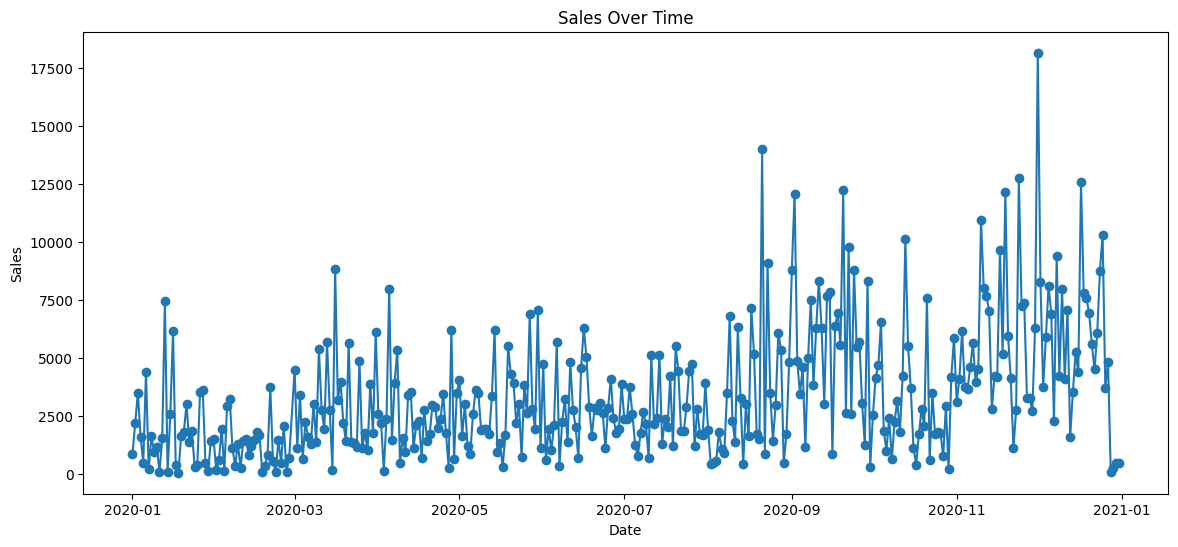

In [69]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_over_time = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

####7.Sales by Customer Segment



<ipython-input-74-bb4a548f2bf5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='GnBu')


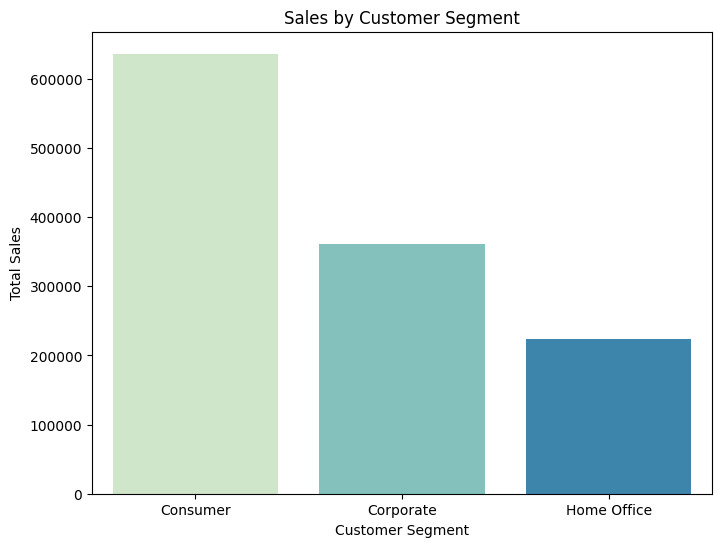

In [74]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='GnBu')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Customer Segment')
plt.show()


####8.Postal Code Coverage

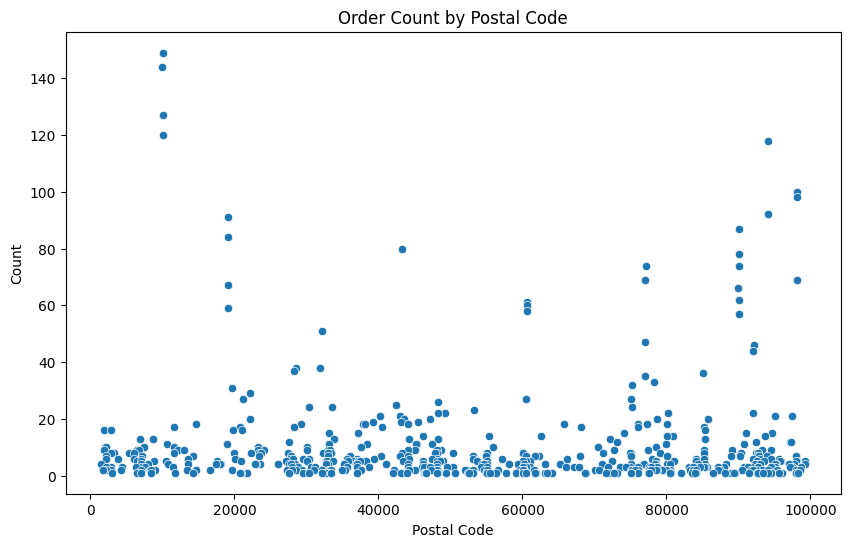

In [64]:
postal_code_count = df['Postal Code'].value_counts().reset_index()
postal_code_count.columns = ['Postal Code', 'Count']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=postal_code_count, x='Postal Code', y='Count')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Order Count by Postal Code')
plt.show()

####9. Distrubition of segments in each state


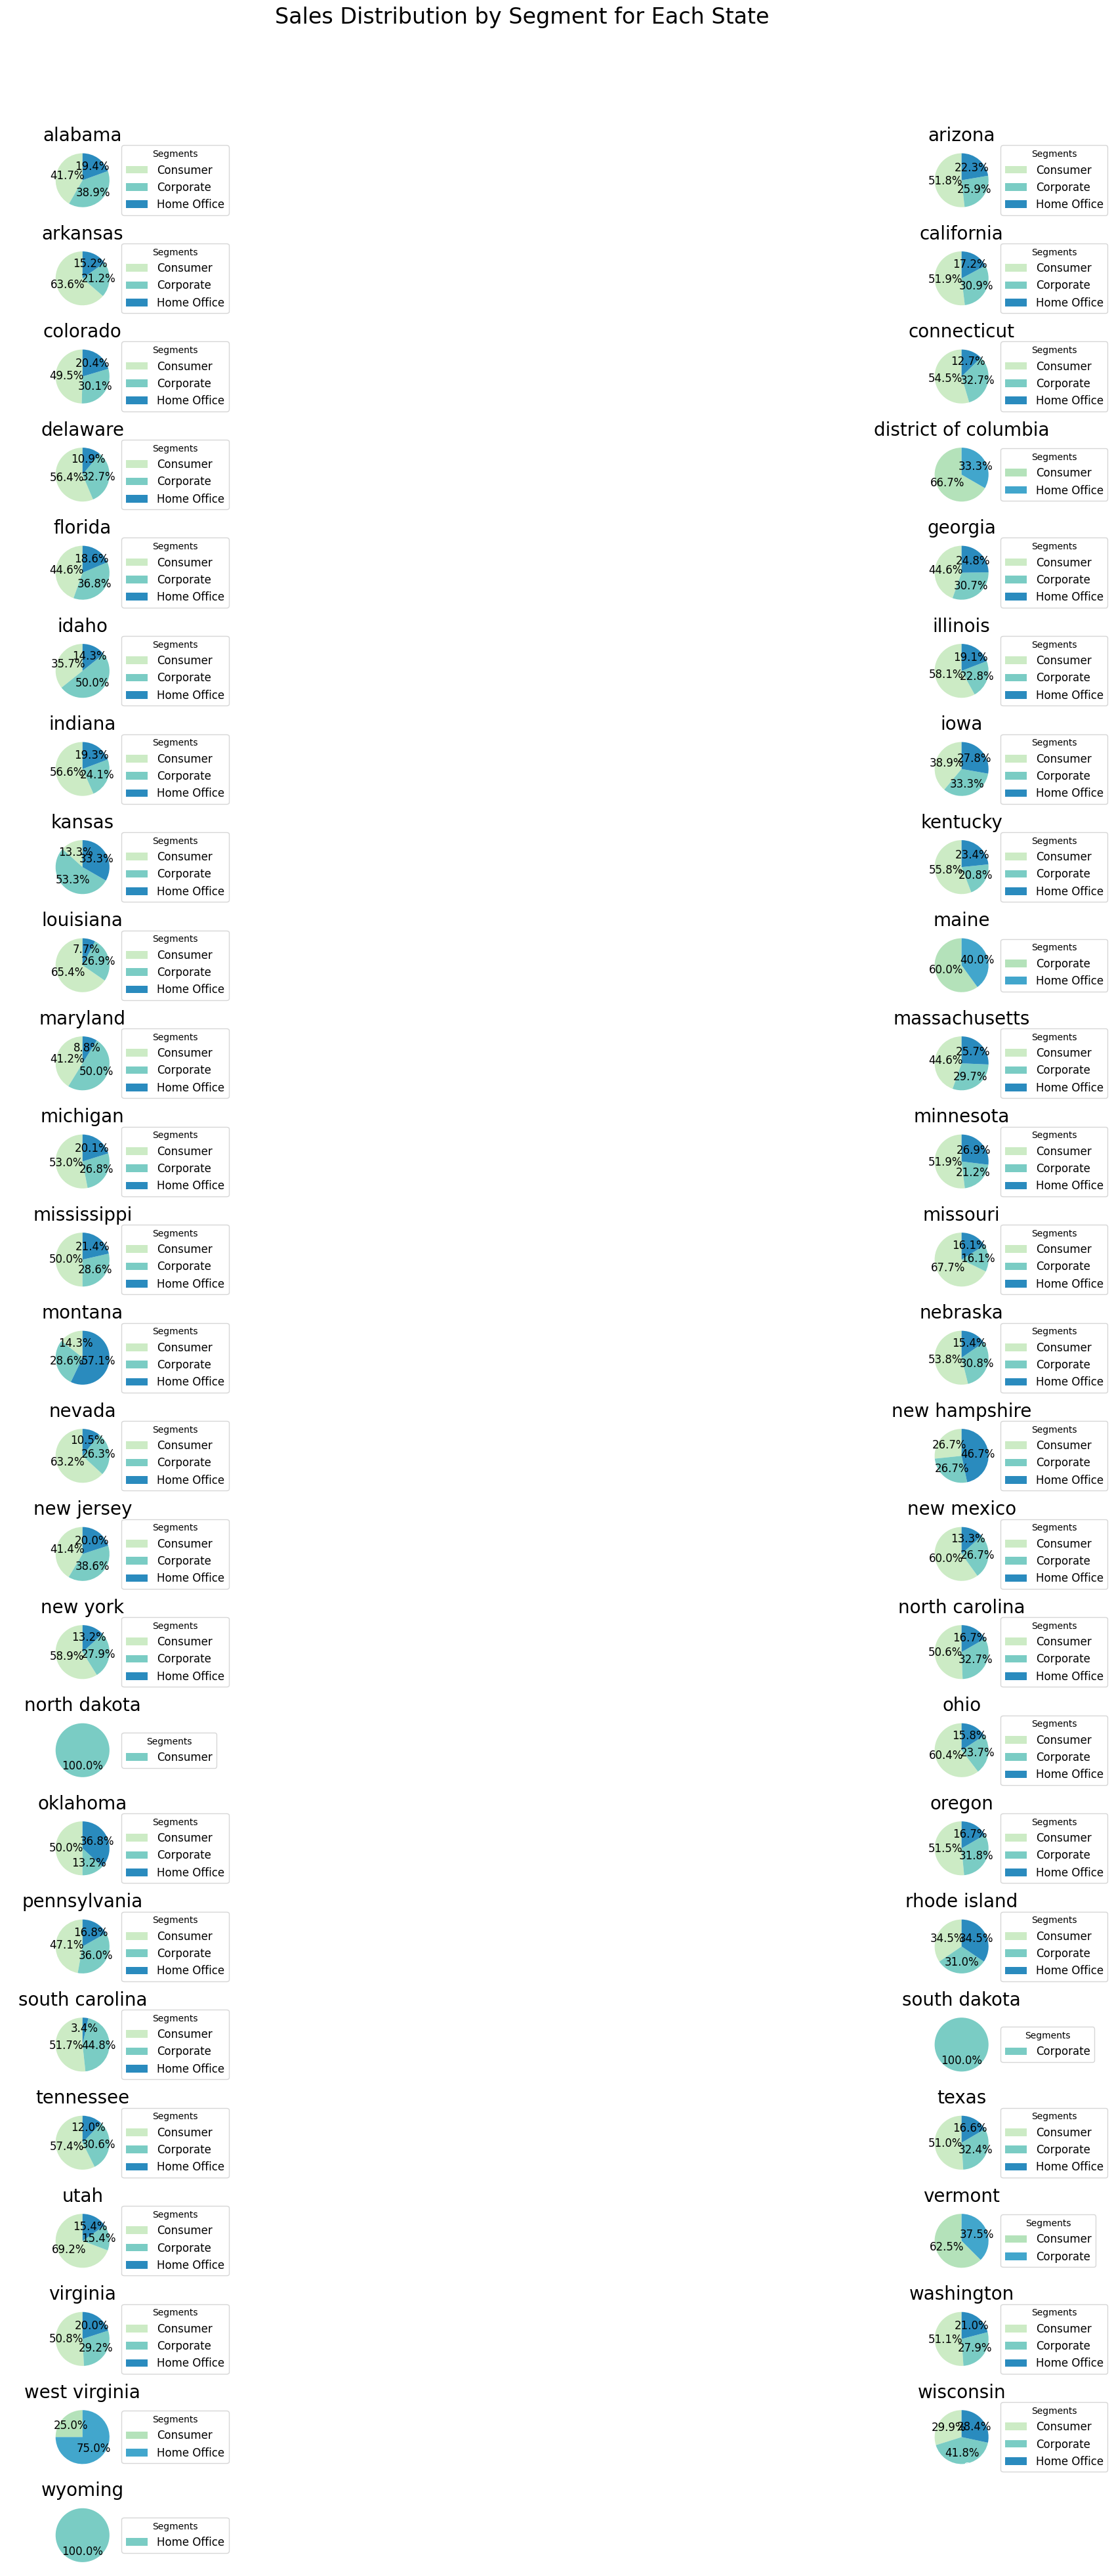

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_segment_sales = df.groupby(['State', 'Segment']).size().reset_index(name='Count')
states = df_segment_sales['State'].unique()
num_states = len(states)
cols = 2
rows = (num_states // cols) + 1
fig, axes = plt.subplots(rows, cols, figsize=(30, 40))
axes = axes.flatten()
for i, state in enumerate(states):
    state_data = df_segment_sales[df_segment_sales['State'] == state]

    labels = state_data['Segment']
    sizes = state_data['Count']

    colors = sns.color_palette('GnBu', len(labels))

    wedges, texts, autotexts = axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                           colors=colors, textprops=dict(color="w"))

    axes[i].set_title(state, fontsize=20)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('black')

    axes[i].legend(wedges, labels, title="Segments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Sales Distribution by Segment for Each State', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


####10.Sales Heatmap by Segment and Region

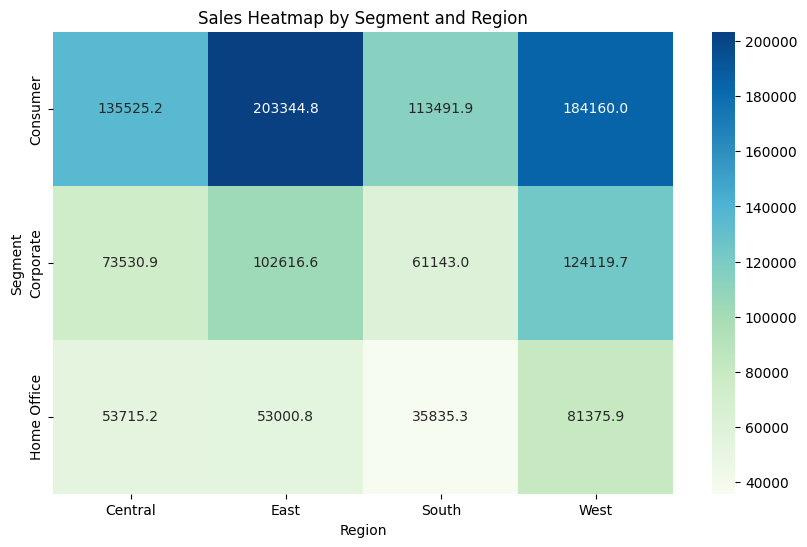

In [80]:
sales_heatmap = df.pivot_table(values='Sales', index='Segment', columns='Region', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(sales_heatmap, annot=True, fmt=".1f", cmap='GnBu')
plt.title('Sales Heatmap by Segment and Region')
plt.show()

# **Data Cleaning**

####Step-10: Encoding of categorical variables

In [ ]:
df.dtypes


,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Segment,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object


In [ ]:
#converting cat to int

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Ship Mode'] = le.fit_transform(df['Ship Mode'])
df['Segment'] = le.fit_transform(df['Segment'])
df['Category'] = le.fit_transform(df['Category'])
df['Sub-Category'] = le.fit_transform(df['Sub-Category'])
df['State'] = le.fit_transform(df['State'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['Product Name'] = le.fit_transform(df['Product Name'])

In [ ]:
df.dtypes

,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Segment,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
